# **Document Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.patches as patches


In [2]:
# reimport 

df_all_clipped = pd.read_csv("../../../data/analysis_data/df_all_clipped.csv")
df_all_clipped

/tmp/ipykernel_513/1929499320.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all_clipped = pd.read_csv("../../../data/analysis_data/df_all_clipped.csv")


,msg_id_parent,msg_id_child,submission_id,subreddit,exact_time_child,author_child,author_parent,author_submission,finetuned_child_E_norm,finetuned_child_I_norm,...,finetuned_parent_len_norm_z_trans_EMI,finetuned_child_len_norm_z_trans_EMI,finetuned_submission_len_norm_z_trans_EMI,self_parent_len_norm_z_trans_EMI,self_child_len_norm_z_trans_EMI,self_submission_len_norm_z_trans_EMI,predictions_label_ft,predictions_score_ft,predictions_prob_disagree,predictions_ft
0,c7ecp8d,c7ecs2n,14m325,Ask_Politics,1355166551.0,karmanaut,Ramblin_Dash,karmanaut,0.056203,0.047469,...,0.635128,0.111758,0.101339,1.240049,0.499480,-0.135574,0,0.6180,0.38180,no_disagreement
1,c7ecp8d,c7ecxpk,14m325,Ask_Politics,1355167049.0,zoolander951,Ramblin_Dash,karmanaut,0.084537,0.065886,...,0.635128,0.224463,0.101339,1.240049,0.861832,-0.135574,0,0.7134,0.28640,no_disagreement
2,c7ecp8d,c7eflag,14m325,Ask_Politics,1355175187.0,zossima,Ramblin_Dash,karmanaut,0.038321,-0.036267,...,0.635128,0.777773,0.101339,1.240049,1.104092,-0.135574,0,0.6580,0.34180,no_disagreement
3,c7efx8q,c7ejh1d,14m325,Ask_Politics,1355187644.0,fathermocker,senatorskeletor,karmanaut,0.028981,-0.000700,...,0.234619,0.314984,0.101339,1.187509,0.728544,-0.135574,1,0.9507,0.95070,disagree
4,c7efx8q,c7f8140,14m325,Ask_Politics,1355286254.0,PKMKII,senatorskeletor,karmanaut,0.018974,-0.067049,...,0.234619,0.886919,0.101339,1.187509,1.356398,-0.135574,0,0.8580,0.14180,no_disagreement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4938799,kfkh5ib,kfmd52k,18uirzt,politics,1970-01-01 00:00:01.703977996,Knightforlife,freddiethebaer,optimalg,0.249565,0.178504,...,3.112414,0.819523,-0.065721,2.081093,0.213635,-0.224799,0,0.9550,0.04495,no_disagreement
4938800,kfklsb6,kforzbx,18uirzt,politics,1970-01-01 00:00:01.704023024,bakerfredricka,4blockhead,optimalg,0.152297,0.168448,...,1.810992,-0.080931,-0.065721,1.475308,0.316076,-0.224799,0,0.9920,0.00774,no_disagreement
4938801,kfmq5kr,kfp6tzv,18uirzt,politics,1970-01-01 00:00:01.704032059,glassjar1,DoubleTFan,optimalg,0.059733,0.064333,...,0.599825,-0.014813,-0.065721,NaN,-0.405775,-0.224799,1,0.8500,0.85000,disagree
4938802,kfp3d4v,kfp8xh8,18uirzt,politics,1970-01-01 00:00:01.704033069,HaulinBoats,4blockhead,optimalg,0.111970,0.181527,...,-0.241116,-0.622660,-0.065721,0.968095,-0.515354,-0.224799,0,0.9414,0.05875,no_disagreement


In [3]:
# reimport test

df_all_non_clipped = pd.read_csv("../../../data/analysis_data/df_all_non_clipped.csv")
df_all_non_clipped

/tmp/ipykernel_513/614145333.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all_non_clipped = pd.read_csv("../../../data/analysis_data/df_all_non_clipped.csv")


,msg_id_parent,msg_id_child,submission_id,subreddit,exact_time_child,author_child,author_parent,author_submission,finetuned_child_E_norm,finetuned_child_I_norm,...,finetuned_parent_len_norm_z_trans_EMI,finetuned_child_len_norm_z_trans_EMI,finetuned_submission_len_norm_z_trans_EMI,self_parent_len_norm_z_trans_EMI,self_child_len_norm_z_trans_EMI,self_submission_len_norm_z_trans_EMI,predictions_label_ft,predictions_score_ft,predictions_prob_disagree,predictions_ft
0,c7ecp8d,c7ecs2n,14m325,Ask_Politics,1355166551.0,karmanaut,Ramblin_Dash,karmanaut,0.053025,0.072843,...,0.514532,-0.116730,0.594431,0.624110,-0.011457,0.172262,0,0.6180,0.38180,no_disagreement
1,c7ecp8d,c7ecxpk,14m325,Ask_Politics,1355167049.0,zoolander951,Ramblin_Dash,karmanaut,0.040605,0.001874,...,0.514532,0.363800,0.594431,0.624110,0.012864,0.172262,0,0.7134,0.28640,no_disagreement
2,c7ecp8d,c7eflag,14m325,Ask_Politics,1355175187.0,zossima,Ramblin_Dash,karmanaut,0.037034,-0.026841,...,0.514532,0.571814,0.594431,0.624110,0.600814,0.172262,0,0.6580,0.34180,no_disagreement
3,c7efx8q,c7ejh1d,14m325,Ask_Politics,1355187644.0,fathermocker,senatorskeletor,karmanaut,0.046751,0.040446,...,0.269966,0.096978,0.594431,0.130100,0.070296,0.172262,1,0.9507,0.95070,disagree
4,c7efx8q,c7f8140,14m325,Ask_Politics,1355286254.0,PKMKII,senatorskeletor,karmanaut,0.029991,-0.043360,...,0.269966,0.644853,0.594431,0.130100,0.612353,0.172262,0,0.8580,0.14180,no_disagreement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4938799,kfkh5ib,kfmd52k,18uirzt,politics,1970-01-01 00:00:01.703977996,Knightforlife,freddiethebaer,optimalg,0.289315,0.222072,...,1.250681,0.671616,-0.580210,1.062374,0.498045,-0.857240,0,0.9550,0.04495,no_disagreement
4938800,kfklsb6,kforzbx,18uirzt,politics,1970-01-01 00:00:01.704023024,bakerfredricka,4blockhead,optimalg,0.192579,0.210383,...,1.367783,-0.043416,-0.580210,1.165189,-0.381238,-0.857240,0,0.9920,0.00774,no_disagreement
4938801,kfmq5kr,kfp6tzv,18uirzt,politics,1970-01-01 00:00:01.704032059,glassjar1,DoubleTFan,optimalg,0.078374,0.101258,...,-0.197753,-0.140261,-0.580210,0.242695,-0.122822,-0.857240,1,0.8500,0.85000,disagree
4938802,kfp3d4v,kfp8xh8,18uirzt,politics,1970-01-01 00:00:01.704033069,HaulinBoats,4blockhead,optimalg,0.137089,0.224533,...,0.600514,-0.617072,-0.580210,0.207855,-0.789836,-0.857240,0,0.9414,0.05875,no_disagreement


In [4]:


def plot_EI_similarity_grid(df, title="Distribution of Evidence and Intuition Similarity Scores - Document Level", filepath = "03_document_analysis/Distribution_E_I_Doc_non_clipped.pdf"):
    

    fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
    fig.suptitle(title, fontsize=16)

    row_labels = ['Fine-Tuned Model', 'Self-Built Model']
    col_labels = ['Submission', 'Comment', 'Reply']
    models = ['finetuned', 'self']
    text_types = ['submission', 'parent', 'child']
    colors = {'E': '#1F77B4', 'I': '#FF7F0E'}


    unique_submission = df.drop_duplicates(subset="submission_id")
    unique_parent = df.drop_duplicates(subset="msg_id_parent")
    unique_child = df.drop_duplicates(subset="msg_id_child")

    unique_df = {"submission" : unique_submission,
                "parent": unique_parent,
                "child" : unique_child}

    for row_idx, model in enumerate(models):
        for col_idx, text_type in enumerate(text_types):
            ax = axes[row_idx, col_idx]
            
            sns.kdeplot(data=unique_df[text_type][f"{model}_{text_type}_E_norm"], ax=ax, label='Evidence (E)', color=colors['E'], fill=True, alpha=0.5)
            sns.kdeplot(data=unique_df[text_type][f"{model}_{text_type}_I_norm"], ax=ax, label='Intuition (I)', color=colors['I'], fill=True, alpha=0.5)

            if row_idx == 0:
                ax.set_title(col_labels[col_idx], fontsize=14)
            if col_idx == 0:
                ax.set_ylabel(row_labels[row_idx], fontsize=14)

            if row_idx == 1 and col_idx == 2:
                ax.legend(loc='upper right')

            ax.grid(True)
            ax.set_xlabel("")

    # Set common x and y labels
    fig.text(0.5, -0.002, 'Similarity Score', ha='center', fontsize=12)
    #fig.text(0.04, 0.5, 'Density', va='center', rotation='vertical', fontsize=12)

    plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
    plt.savefig(filepath)
    plt.show()

#plot_EI_similarity_grid(df_all_non_clipped)


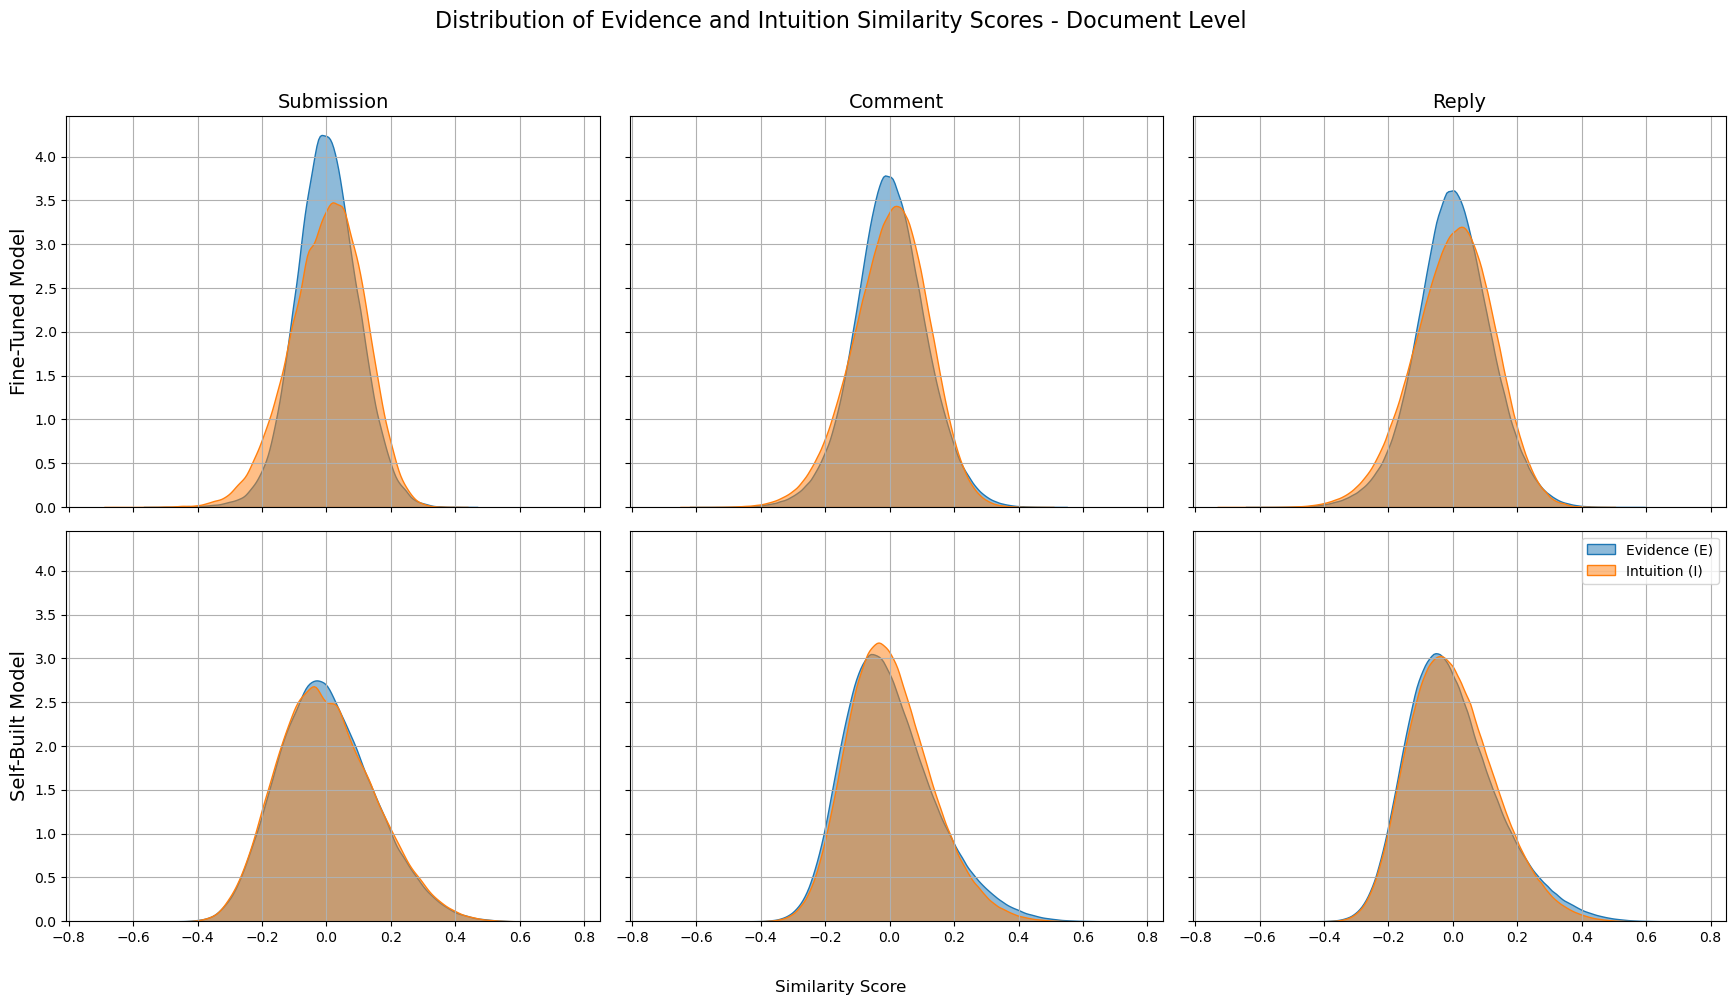

In [17]:
def plot_EI_similarity_collapsed(df, title="Distribution of Evidence and Intuition Similarity Scores - Document Level (All Text Types Combined)", 
                                  filepath="03_document_analysis/Distribution_E_I_Documents.pdf"):

    # Drop duplicates by ID to get unique texts
    unique_submission = df.drop_duplicates(subset="submission_id")[["submission_id", "finetuned_submission_E_norm", "finetuned_submission_I_norm"]].rename(columns = {"submission_id" : "id",
                                                                                                                                                    "finetuned_submission_E_norm" : "E_similarity",
                                                                                                                                                    "finetuned_submission_I_norm" : "I_similarity"})
    unique_parent = df.drop_duplicates(subset="msg_id_parent")[["msg_id_parent", "finetuned_parent_E_norm", "finetuned_parent_I_norm"]].rename(columns = {"msg_id_parent" : "id",
                                                                                                                                                    "finetuned_parent_E_norm" : "E_similarity",
                                                                                                                                                    "finetuned_parent_I_norm" : "I_similarity"})
    unique_child = df.drop_duplicates(subset="msg_id_child")[["msg_id_child", "finetuned_child_E_norm", "finetuned_child_I_norm"]].rename(columns = {"msg_id_child" : "id",
                                                                                                                                                    "finetuned_child_E_norm" : "E_similarity",
                                                                                                                                                    "finetuned_child_I_norm" : "I_similarity"})

    # Combine all unique entries
    df_all_unique = pd.concat([unique_submission, unique_parent, unique_child])

    # Set up the plot
    fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharex=True, sharey=True)

    models = ['finetuned', 'self']
    model_titles = ['Fine-Tuned Model', 'Self-Built Model']
    colors = {'E': '#1F77B4', 'I': '#FF7F0E'}

    for idx, model in enumerate(models):
        ax = axes[idx]
        sns.kdeplot(data=df_all_unique[f"E_similarity"], label="Evidence", color=colors['E'], fill=True, ax=ax, alpha=0.5)
        sns.kdeplot(data=df_all_unique[f"I_similarity"], label="Intuition", color=colors['I'], fill=True, ax=ax, alpha=0.5)

        ax.set_title(model_titles[idx], fontsize=18)
        ax.set_xlabel("Similarity Score", fontsize=18)
        ax.set_ylabel("Density", fontsize=18)
        ax.tick_params(axis='x', labelsize=18)
        ax.tick_params(axis='y', labelsize=18)
        ax.legend(fontsize=14)
        ax.grid(True)

    #fig.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.savefig(filepath)
    plt.show()

plot_EI_similarity_collapsed(df=df_all_non_clipped)

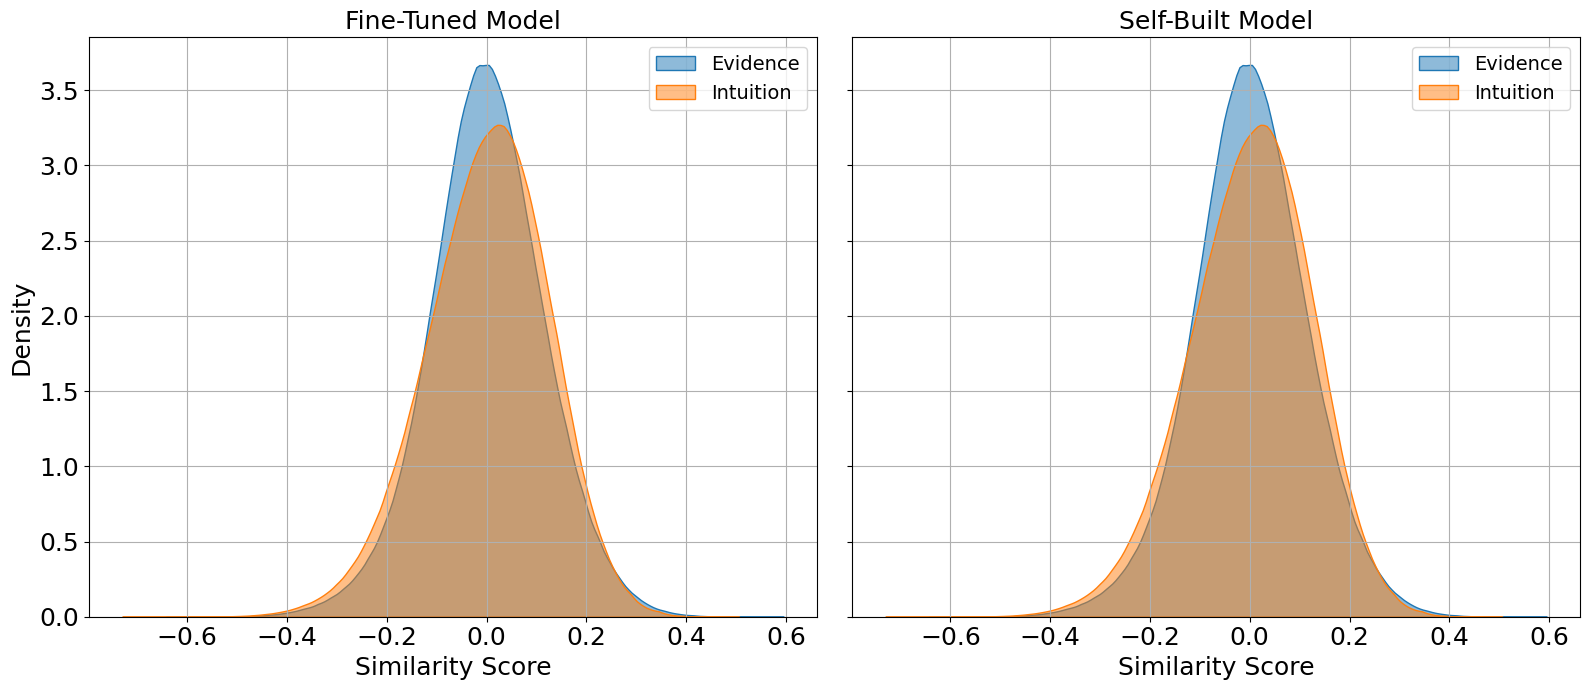

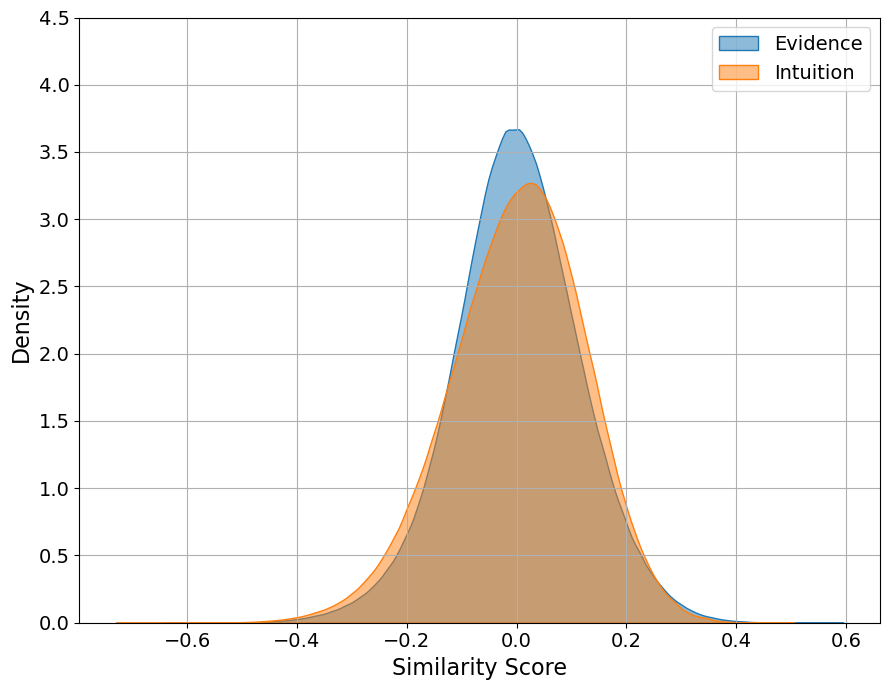

In [4]:
def plot_EI_similarity_collapsed_finetuned(df, filepath="03_document_analysis/Distribution_E_I_Scores_Documents_FinetunedOnly.pdf"):

    # Drop duplicates by ID to get unique texts
    unique_submission = df.drop_duplicates(subset="submission_id")[["submission_id", "finetuned_submission_E_norm", "finetuned_submission_I_norm"]].rename(columns = {
        "submission_id" : "id",
        "finetuned_submission_E_norm" : "E_similarity",
        "finetuned_submission_I_norm" : "I_similarity"
    })
    
    unique_parent = df.drop_duplicates(subset="msg_id_parent")[["msg_id_parent", "finetuned_parent_E_norm", "finetuned_parent_I_norm"]].rename(columns = {
        "msg_id_parent" : "id",
        "finetuned_parent_E_norm" : "E_similarity",
        "finetuned_parent_I_norm" : "I_similarity"
    })
    
    unique_child = df.drop_duplicates(subset="msg_id_child")[["msg_id_child", "finetuned_child_E_norm", "finetuned_child_I_norm"]].rename(columns = {
        "msg_id_child" : "id",
        "finetuned_child_E_norm" : "E_similarity",
        "finetuned_child_I_norm" : "I_similarity"
    })

    # Combine all unique entries
    df_all_unique = pd.concat([unique_submission, unique_parent, unique_child])

    # Set up the plot
    fig, ax = plt.subplots(figsize=(9, 7))

    colors = {'E': '#1F77B4', 'I': '#FF7F0E'}

    # KDE plots
    sns.kdeplot(data=df_all_unique["E_similarity"], label="Evidence", color=colors['E'], fill=True, ax=ax, alpha=0.5)
    sns.kdeplot(data=df_all_unique["I_similarity"], label="Intuition", color=colors['I'], fill=True, ax=ax, alpha=0.5)

    # Labels and formatting
    #ax.set_title("Fine-Tuned Model", fontsize=18)
    ax.set_ylim(0, 4.5)
    ax.set_xlabel("Similarity Score", fontsize=16)
    ax.set_ylabel("Density", fontsize=16)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.legend(fontsize=14)
    ax.grid(True)

    #fig.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.savefig(filepath)
    plt.show()
    
plot_EI_similarity_collapsed_finetuned(df=df_all_non_clipped)

In [6]:


def plot_EMI_grid(df, title="Distribution of EMI Scores - Document Level", filepath = "03_document_analysis/Distribution_EMI_Doc_non_clipped.pdf"):
    

    fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
    fig.suptitle(title, fontsize=16)

    row_labels = ['Fine-Tuned Model', 'Self-Built Model']
    col_labels = ['Submission', 'Comment', 'Reply']
    models = ['finetuned', 'self']
    text_types = ['submission', 'parent', 'child']

    unique_submission = df.drop_duplicates(subset="submission_id")
    unique_parent = df.drop_duplicates(subset="msg_id_parent")
    unique_child = df.drop_duplicates(subset="msg_id_child")

    unique_df = {"submission" : unique_submission,
                "parent": unique_parent,
                "child" : unique_child}
    
    for row_idx, model in enumerate(models):
        for col_idx, text_type in enumerate(text_types):
            ax = axes[row_idx, col_idx]
            
            sns.kdeplot(data=unique_df[text_type][f"{model}_{text_type}_len_EMI_z_trans"], ax=ax, label='First EMI, then z-trans', color='steelblue', fill=True, alpha=0.5)
            sns.kdeplot(data=unique_df[text_type][f"{model}_{text_type}_len_norm_z_trans_EMI"], ax=ax, label='First z-trans, then EMI', color='salmon', fill=True, alpha=0.5)

            if row_idx == 0:
                ax.set_title(col_labels[col_idx], fontsize=14)
            if col_idx == 0:
                ax.set_ylabel(row_labels[row_idx], fontsize=14)

            if row_idx == 1 and col_idx == 2:
                ax.legend(loc='upper right')

            ax.grid(True)
            ax.set_xlabel("")

    # Set common x and y labels
    fig.text(0.5, -0.002, 'Similarity Score', ha='center', fontsize=12)
    #fig.text(0.04, 0.5, 'Density', va='center', rotation='vertical', fontsize=12)

    plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
    plt.savefig(filepath)
    plt.show()



#plot_EMI_grid(df_all_non_clipped)

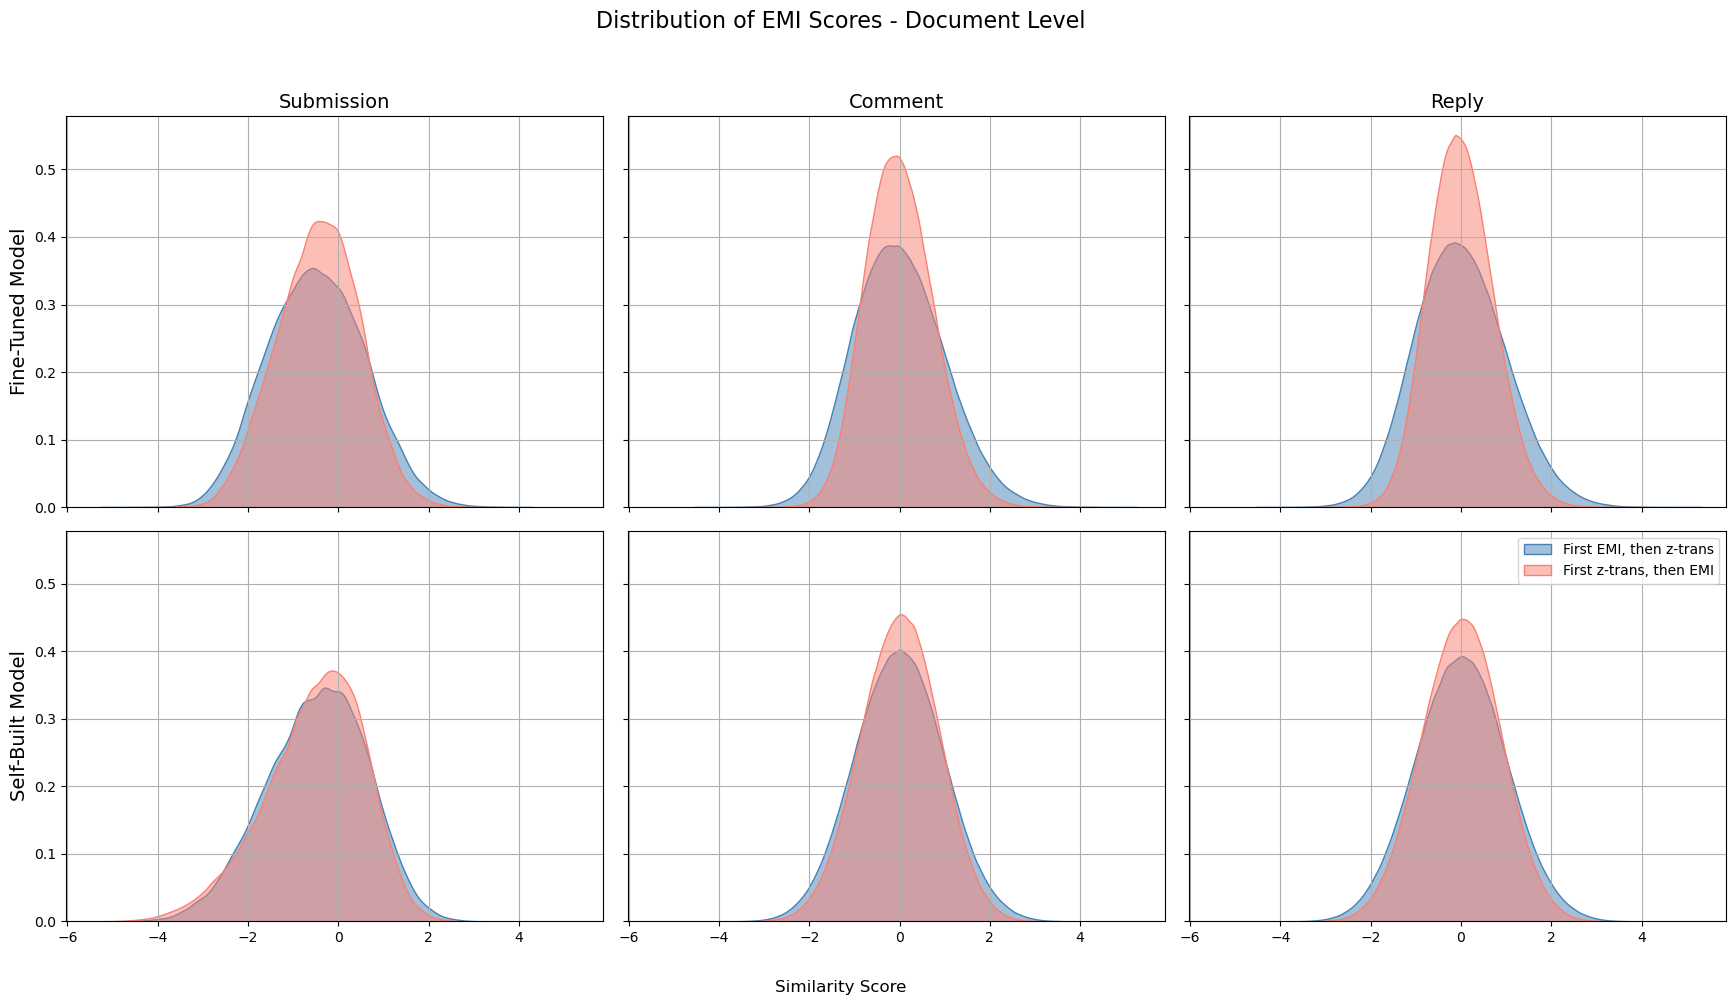

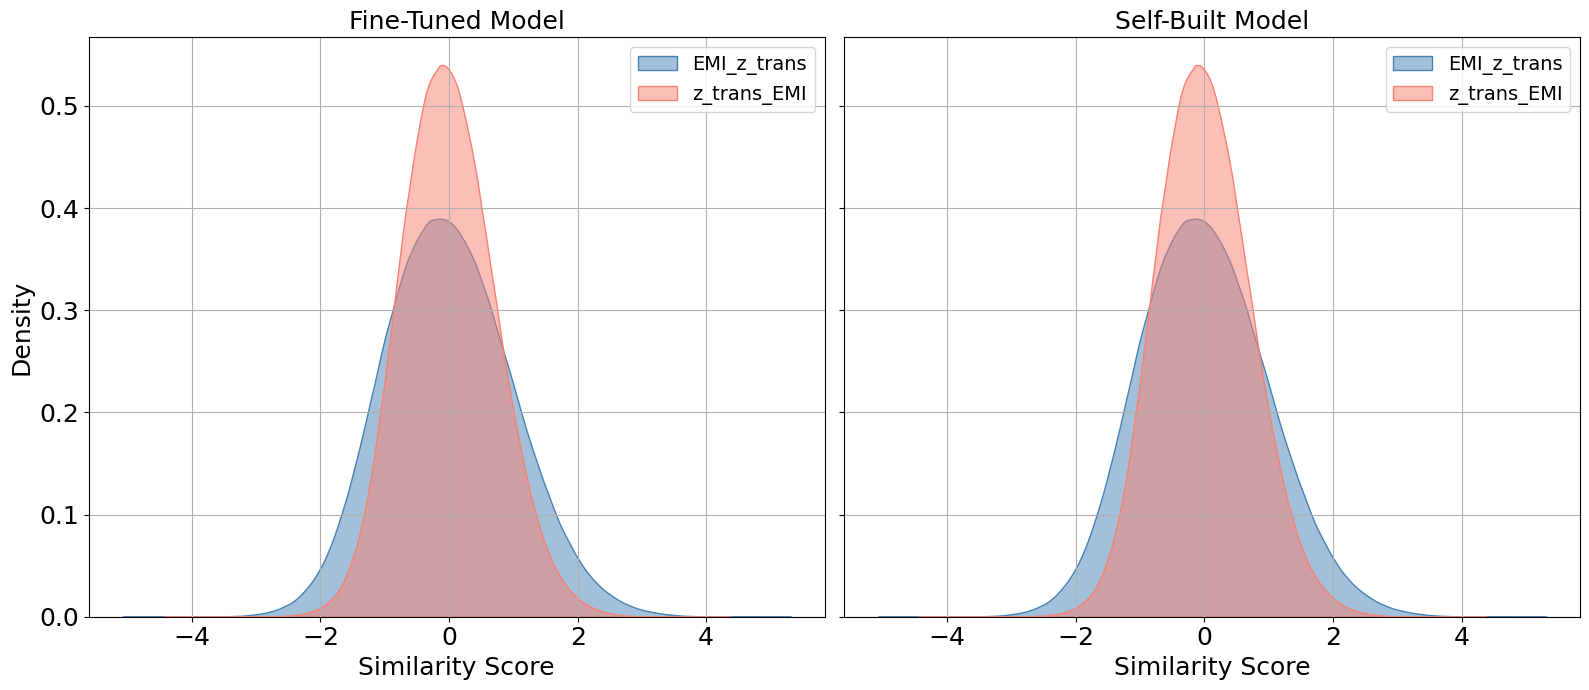

In [23]:
def plot_EMI(df, filepath="03_document_analysis/Distribution_EMI_Documents.pdf"):

    # Drop duplicates by ID to get unique texts
    unique_submission = df.drop_duplicates(subset="submission_id")[["submission_id", 'finetuned_submission_len_EMI_z_trans', 
                                                                    'finetuned_submission_len_norm_z_trans_EMI']].rename(columns = {"submission_id" : "id",
                                                                                                                                    "finetuned_submission_len_EMI_z_trans" : "EMI_z_trans",
                                                                                                                                    "finetuned_submission_len_norm_z_trans_EMI" : "z_trans_EMI"})
    unique_parent = df.drop_duplicates(subset="msg_id_parent")[["msg_id_parent", 'finetuned_parent_len_EMI_z_trans', 
                                                                    'finetuned_parent_len_norm_z_trans_EMI']].rename(columns = {"msg_id_parent" : "id",
                                                                                                                                "finetuned_parent_len_EMI_z_trans" : "EMI_z_trans",
                                                                                                                                "finetuned_parent_len_norm_z_trans_EMI" : "z_trans_EMI"})
    unique_child = df.drop_duplicates(subset="msg_id_child")[["msg_id_child", 'finetuned_child_len_EMI_z_trans', 
                                                                    'finetuned_child_len_norm_z_trans_EMI']].rename(columns = {"msg_id_child" : "id",
                                                                                                                               "finetuned_child_len_EMI_z_trans" : "EMI_z_trans",
                                                                                                                               "finetuned_child_len_norm_z_trans_EMI" : "z_trans_EMI"})

    # Combine all unique entries
    df_all_unique = pd.concat([unique_submission, unique_parent, unique_child])

    # Set up the plot
    fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharex=True, sharey=True)

    models = ['finetuned', 'self']
    model_titles = ['Fine-Tuned Model', 'Self-Built Model']

    for idx, model in enumerate(models):
        ax = axes[idx]
        sns.kdeplot(data=df_all_unique[f"EMI_z_trans"], label="EMI_z_trans", color='steelblue', fill=True, ax=ax, alpha=0.5)
        sns.kdeplot(data=df_all_unique[f"z_trans_EMI"], label="z_trans_EMI", color='salmon', fill=True, ax=ax, alpha=0.5)

        ax.set_title(model_titles[idx], fontsize=18)
        ax.set_xlabel("Similarity Score", fontsize=18)
        ax.set_ylabel("Density", fontsize=18)
        ax.tick_params(axis='x', labelsize=18)
        ax.tick_params(axis='y', labelsize=18)
        ax.legend(fontsize=14)
        ax.grid(True)

    #fig.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.savefig(filepath)
    plt.show()

plot_EMI(df=df_all_non_clipped)

In [5]:
df_all_non_clipped.columns

Index(['msg_id_parent', 'msg_id_child', 'submission_id', 'subreddit',
       'exact_time_child', 'author_child', 'author_parent',
       'author_submission', 'finetuned_child_E_norm', 'finetuned_child_I_norm',
       'finetuned_parent_E_norm', 'finetuned_parent_I_norm',
       'finetuned_submission_E_norm', 'finetuned_submission_I_norm',
       'self_child_E_norm', 'self_child_I_norm', 'self_parent_E_norm',
       'self_parent_I_norm', 'self_submission_E_norm',
       'self_submission_I_norm', 'finetuned_parent_len_EMI_z_trans',
       'finetuned_child_len_EMI_z_trans',
       'finetuned_submission_len_EMI_z_trans', 'self_parent_len_EMI_z_trans',
       'self_child_len_EMI_z_trans', 'self_submission_len_EMI_z_trans',
       'finetuned_parent_len_norm_z_trans_EMI',
       'finetuned_child_len_norm_z_trans_EMI',
       'finetuned_submission_len_norm_z_trans_EMI',
       'self_parent_len_norm_z_trans_EMI', 'self_child_len_norm_z_trans_EMI',
       'self_submission_len_norm_z_trans_EMI', '

In [18]:
unique_submission = df_all_non_clipped[['submission_id', 'author_submission', 'finetuned_submission_len_EMI_z_trans', 'self_submission_len_EMI_z_trans', 
                                    'finetuned_submission_len_norm_z_trans_EMI', 'self_submission_len_norm_z_trans_EMI']].drop_duplicates(subset="submission_id")


unique_parent = df_all_non_clipped.drop_duplicates(subset="msg_id_parent")
unique_child = df_all_non_clipped.drop_duplicates(subset="msg_id_child")

unique_df = {"submission" : unique_submission,
            "parent": unique_parent,
            "child" : unique_child}

In [19]:
unique_submission = unique_submission.rename(columns = {"submission_id" : "id", 
                                   'finetuned_submission_len_EMI_z_trans' : 'ft_len_EMI_z_trans',
                                    'self_submission_len_EMI_z_trans' : 'sb_len_EMI_z_trans',
                                    'finetuned_submission_len_norm_z_trans_EMI' : 'ft_len_z_trans_EMI', 
                                    'self_submission_len_norm_z_trans_EMI': 'sb_len_z_trans_EMI'})

unique_submission["type"] = "Submission"
unique_parent = unique_parent[['msg_id_parent', 'author_parent', 'finetuned_parent_len_EMI_z_trans', 
                               'self_parent_len_EMI_z_trans', 'finetuned_parent_len_norm_z_trans_EMI', 
                               'self_parent_len_norm_z_trans_EMI']].rename(columns = {"msg_id_parent" : "id", 
                                   'finetuned_parent_len_EMI_z_trans' : 'ft_len_EMI_z_trans',
                                    'self_parent_len_EMI_z_trans' : 'sb_len_EMI_z_trans',
                                    'finetuned_parent_len_norm_z_trans_EMI' : 'ft_len_z_trans_EMI', 
                                    'self_parent_len_norm_z_trans_EMI': 'sb_len_z_trans_EMI'})
unique_parent["type"] = "Comment"
unique_child = unique_child[['msg_id_child', 'author_child', 'finetuned_child_len_EMI_z_trans', 
                               'self_child_len_EMI_z_trans', 'finetuned_child_len_norm_z_trans_EMI', 
                               'self_child_len_norm_z_trans_EMI']].rename(columns = {"msg_id_child" : "id", 
                                   'finetuned_child_len_EMI_z_trans' : 'ft_len_EMI_z_trans',
                                    'self_child_len_EMI_z_trans' : 'sb_len_EMI_z_trans',
                                    'finetuned_child_len_norm_z_trans_EMI' : 'ft_len_z_trans_EMI', 
                                    'self_child_len_norm_z_trans_EMI': 'sb_len_z_trans_EMI'})
unique_child["type"] = "Reply"

In [21]:
all_texts = pd.concat([unique_submission, unique_parent, unique_child]).reset_index(drop = True)
all_texts

,id,author_submission,ft_len_EMI_z_trans,sb_len_EMI_z_trans,ft_len_z_trans_EMI,sb_len_z_trans_EMI,type,author_parent,author_child
0,14m325,karmanaut,0.836455,0.214311,0.594431,0.172262,Submission,NaN,NaN
1,14m26x,karmanaut,-0.149660,0.241953,-0.054438,0.228496,Submission,NaN,NaN
2,14mg1m,karmanaut,-0.664198,-0.448776,-0.372720,-0.348293,Submission,NaN,NaN
3,14m18a,karmanaut,1.243082,1.298082,1.140012,1.167066,Submission,NaN,NaN
4,14mmc8,zossima,2.045797,2.132664,1.543014,1.826305,Submission,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7017618,kfmd52k,NaN,0.757736,0.720232,0.671616,0.498045,Reply,NaN,Knightforlife
7017619,kforzbx,NaN,-0.200630,-0.295144,-0.043416,-0.381238,Reply,NaN,bakerfredricka
7017620,kfp6tzv,NaN,-0.257866,-0.075895,-0.140261,-0.122822,Reply,NaN,glassjar1
7017621,kfp8xh8,NaN,-0.985383,-0.749237,-0.617072,-0.789836,Reply,NaN,HaulinBoats


In [22]:
def plot_emi_corr_matrices(df, save_path='combined_emi_correlation_matrices.pdf'):
    label_fontsize = 16
    tick_fontsize = 14
    title_fontsize = 18
    facet_title_fontsize = 16

    value_cols = [
        'ft_len_EMI_z_trans',
        'sb_len_EMI_z_trans',
        'ft_len_z_trans_EMI',
        'sb_len_z_trans_EMI'
    ]

    label_dict = {
        'ft_len_EMI_z_trans': 'ft: EMI → z',
        'sb_len_EMI_z_trans': 'sb: EMI → z',
        'ft_len_z_trans_EMI': 'ft: z → EMI',
        'sb_len_z_trans_EMI': 'sb: z → EMI'
    }

    type_order = ['Submission', 'Comment', 'Reply']
    
    fig, axes = plt.subplots(1, len(type_order), figsize=(18, 5), sharey=True)

    all_corrs = []
    for text_type in type_order:
        df_sub = df[df['type'] == text_type][value_cols].copy()
        df_sub = df_sub.dropna()
        df_sub = df_sub.rename(columns=label_dict)

        corr = df_sub.corr()
        all_corrs.append(corr)

    global_min = min(c.min().min() for c in all_corrs)
    global_max = max(c.max().max() for c in all_corrs)
    max_abs = max(abs(global_min), abs(global_max))

    for i, (text_type, corr) in enumerate(zip(type_order, all_corrs)):
        hm = sns.heatmap(
            corr,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            center=0,
            vmin=-max_abs, vmax=max_abs,
            ax=axes[i],
            cbar=False,
            square=True,
            linewidths=0.5,
            annot_kws={"size": tick_fontsize}
        )
        axes[i].set_title(text_type, fontsize=facet_title_fontsize)
        axes[i].tick_params(axis='x', rotation=45, labelsize=tick_fontsize)
        axes[i].tick_params(axis='y', rotation=0, labelsize=tick_fontsize)

    # Colorbar
    cbar_ax = fig.add_axes([0.90, 0.19, 0.02, 0.77])
    norm = plt.Normalize(vmin=-max_abs, vmax=max_abs)
    sm = cm.ScalarMappable(cmap="coolwarm", norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, cax=cbar_ax)
    cbar.outline.set_visible(False)
    cbar.ax.set_ylabel("Correlation", fontsize=label_fontsize)
    cbar.ax.tick_params(labelsize=tick_fontsize)

    plt.tight_layout(rect=[0, 0, 0.9, 1])
    plt.savefig(save_path, format='pdf', bbox_inches='tight')
    plt.show()

/tmp/ipykernel_513/3282876465.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


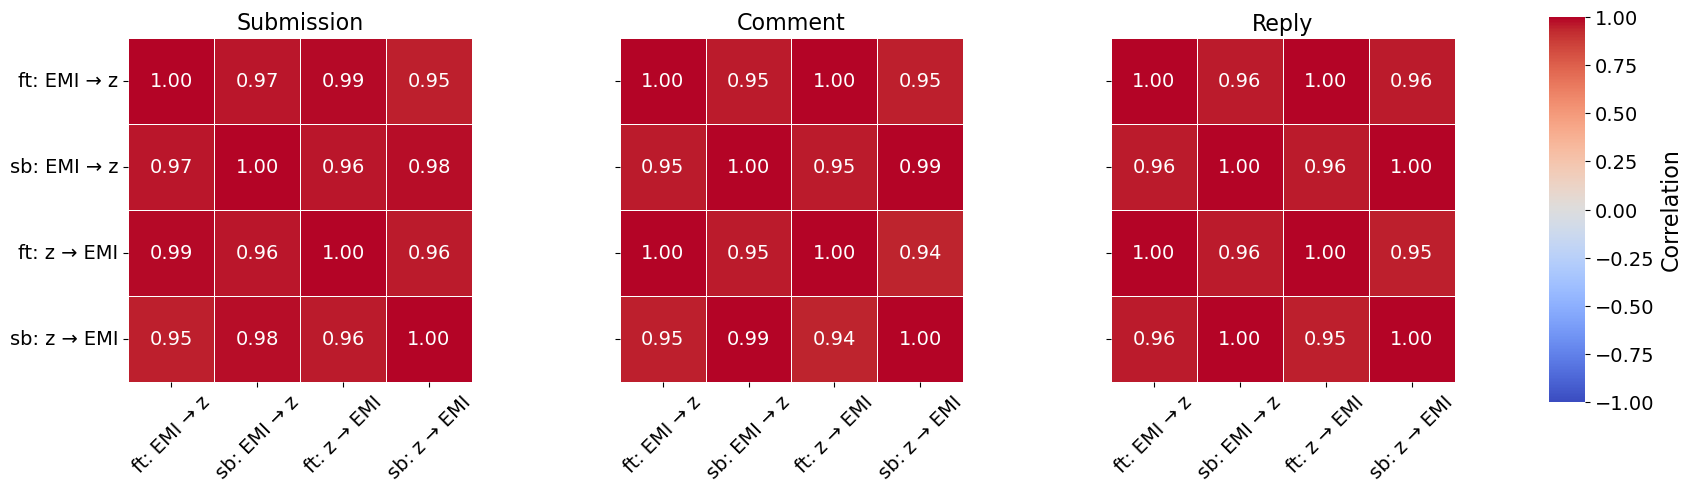

In [23]:
plot_emi_corr_matrices(all_texts)